In [88]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [89]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data for Dataset 1
X1, y1 = make_classification(n_samples=1000, n_features=5, n_classes=3, n_clusters_per_class=1, random_state=42)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=42)


noise_factor = 0.5  # Adjust the noise factor as needed
X2 = X1 + 0.5 + np.random.normal(scale=noise_factor, size=X1.shape)  # You can adjust the shift as needed
y2 = y1  # Keep the label distribution the same

/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

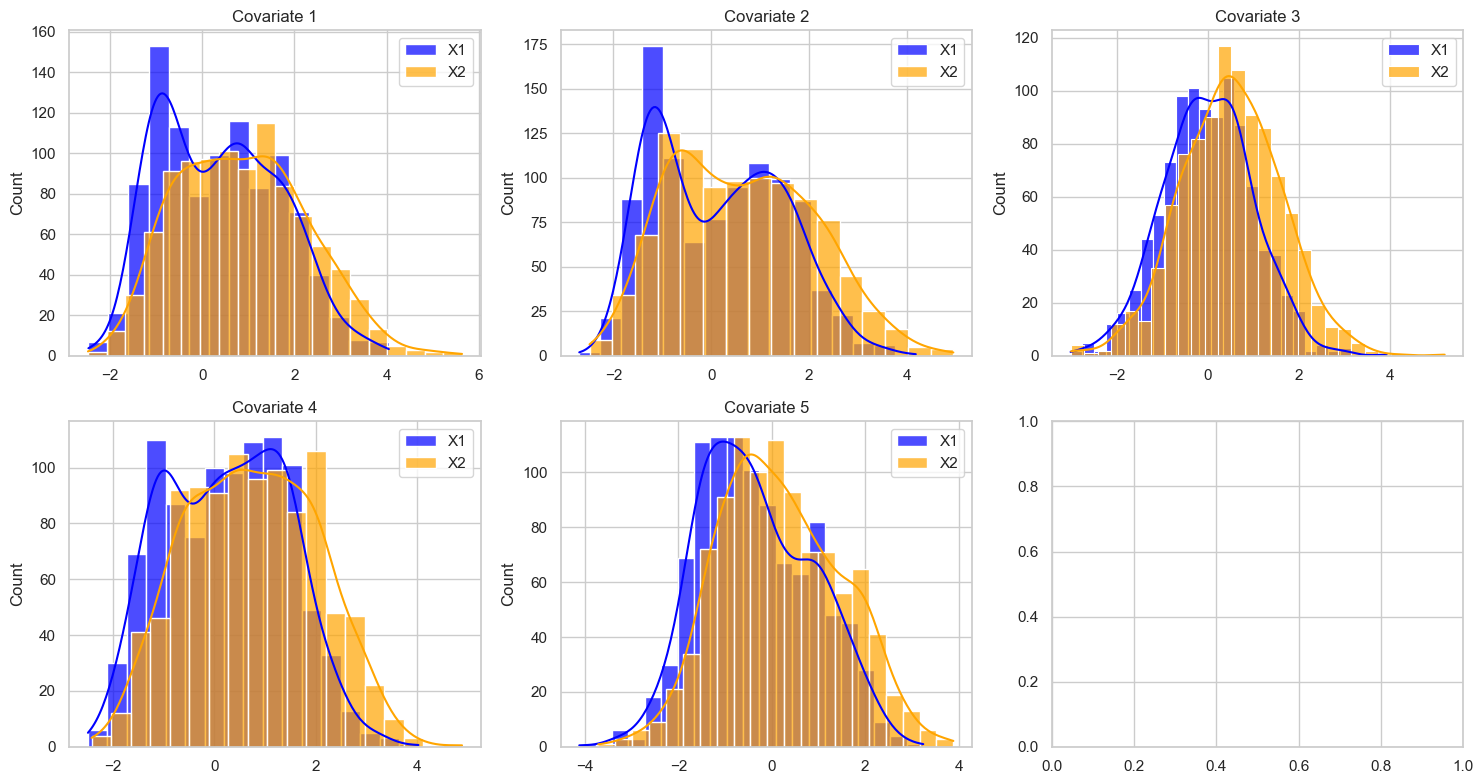

In [90]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Number of covariates/features
num_covariates = X1.shape[1]

# Define the number of rows and columns for the subplot grid
rows = 2  # Number of rows
cols = (num_covariates + 1) // 2  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

# Flatten the axes if there is more than one row
axes = axes.flatten()

# Plot the distribution of each covariate for both datasets on the same plot
for i, ax in enumerate(axes):
    if i < num_covariates:
        # Plot for Covariate i in both datasets
        sns.histplot(X1[:, i], kde=True, color='blue', label='X1', alpha=0.7, ax=ax)
        sns.histplot(X2[:, i], kde=True, color='orange', label='X2', alpha=0.7, ax=ax)
        
        ax.set_title(f'Covariate {i+1}')
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [91]:
X_combined = np.vstack((X1, X2))
y_combined = np.hstack((np.zeros(X1.shape[0]), np.ones(X2.shape[0])))

classifier = LogisticRegression(random_state=42)
classifier.fit(X_combined, y_combined)

y_pred = classifier.predict_proba(X1)
sample_weights = (y_pred[:,1]/y_pred[:,0]) #test over train

In [92]:
classifier_noweight = LogisticRegression(random_state=42)
classifier_noweight.fit(X1, y1)
print("accuracy score on X2: ", classifier_noweight.score(X2, y2))

accuracy score on X2:  0.793


In [93]:
classifier_weight = LogisticRegression(random_state=42)
classifier_weight.fit(X1, y1, sample_weight=sample_weights)
print("accuracy score on X2: ", classifier_weight.score(X2, y2))

accuracy score on X2:  0.798


In [96]:
X1.shape

(1000, 5)

In [95]:
X2.shape

(1000, 5)